## supermarket_sales_Project Analysis by Afeez Alimi
## Facebook page: afeeztheanalyst

## Data Cleaning

In [1]:
import pandas as pd

In [2]:
file = "C:/Users/Alimi Nimotalahi/Desktop/DATACLASS/datasets/supermarket_sales/supermarket_sales.csv"
df = pd.read_csv(file)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#Show the colum names
for i in df.columns:
    print(i)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
Payment
cogs
gross margin percentage
gross income
Rating


In [4]:
df.shape

(1000, 17)

In [5]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
#check the unique values in "Branch"
df["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
#check the unique values in "City"
df["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [8]:
#check the unique values in "Customer type"
df["Customer type"].unique()

array(['Member', 'Normal'], dtype=object)

In [9]:
#check the unique values in "Gender"
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
#check the unique values in "Product line"
df["Product line"].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [11]:
#COGS: Cost of goods sold

In [12]:
#Rename "cogs" column to "Cost of goods sold"
df.rename(columns={"cogs": "Cost of goods sold"}, inplace=True)

In [13]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## wrangle function that provide clean data

In [14]:
import pandas as pd
from datetime import datetime

def wrangle(file):
    df= pd.read_csv(file)

    #Rename "cogs" column to "Cost of goods sold"
    df.rename(columns={"cogs": "Cost of goods sold"}, inplace=True)

    #Replace "/" with "-" in Date columns
    df["Date"]= df["Date"].str.replace("/", "-")

    # Convert date column to datetime format
    df["Date"] = pd.to_datetime(df["Date"], format= "%m-%d-%Y")

    #Format to "%d-%m-%Y"
    df["Date"] = df["Date"].dt.strftime("%d-%m-%Y")

    # Convert date column to datetime format
    df["Date"] = pd.to_datetime(df["Date"], format= "%d-%m-%Y")

    #Sort data by date
    df = df.sort_values("Date")

    #Time to hour format
    df["Time"] = pd.to_datetime(df["Time"], format= "%H:%M").dt.hour

    return df

In [15]:
file_path = "C:/Users/Alimi Nimotalahi/Desktop/DATACLASS/datasets/supermarket_sales/supermarket_sales.csv"
data = wrangle(file_path)

In [16]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11,Cash,125.74,4.761905,6.287,5.0


In [17]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of goods sold,gross margin percentage,gross income,Rating
158,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,2019-03-30,14,Ewallet,874.98,4.761905,43.749,6.0
881,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12,Credit card,81.44,4.761905,4.072,9.5
963,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,2019-03-30,20,Cash,290.46,4.761905,14.523,6.7
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10,Cash,447.40,4.761905,22.370,7.4
474,676-39-6028,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,2019-03-30,17,Cash,322.20,4.761905,16.110,6.6


In [18]:
#Save the cleaned dataset
data.to_csv("C:/Users/Alimi Nimotalahi/Desktop/DATACLASS/datasets/supermarket_sales/cleaned_supermarket_sales.csv", index=False)

## Answering Some Business Questions

## 1. Branch Performance

# Is there a significant difference in customer ratings across different branches?

In [19]:
#using the groupby method tho determine which branch have the hiughest rating
branch_rating= data.groupby("Branch")["Rating"].sum()

In [20]:
branch_rating

Branch
A    2389.2
B    2263.6
C    2319.9
Name: Rating, dtype: float64

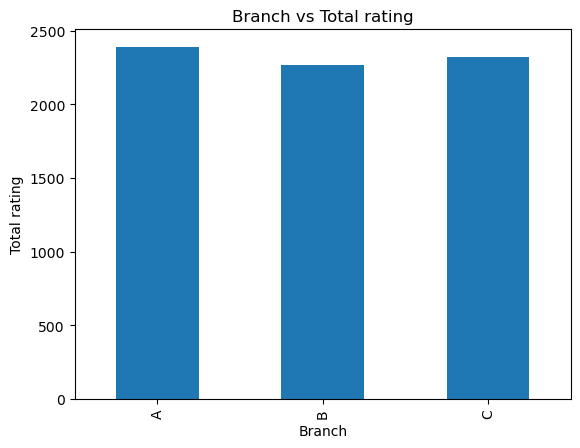

In [21]:
import matplotlib.pyplot as plt
branch_rating.plot(kind = "bar")
plt.title("Branch vs Total rating")
plt.ylabel("Total rating")
plt.show()

## Which branch generates the highest gross income?

In [22]:
#using the groupby method tho determine which branch have the highest gross income
branch_gross_income = data.groupby("Branch")["gross income"].sum()

In [23]:
branch_gross_income

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

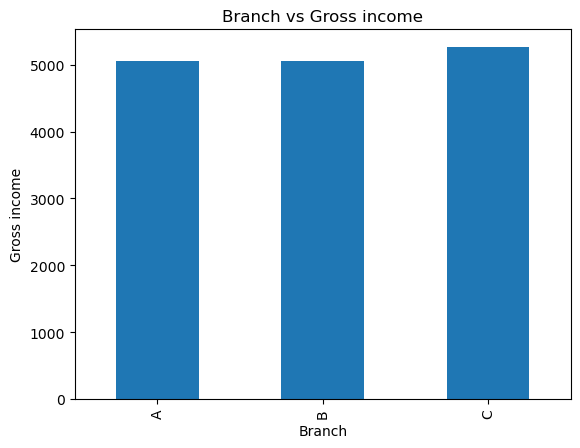

In [24]:
branch_gross_income.plot(kind = "bar")
plt.title("Branch vs Gross income")
plt.ylabel("Gross income")
plt.show()

## Is there a significant difference in customer ratings across different cities?

In [25]:
#using the groupby method tho determine which city have the hiughest rating
city_rating= data.groupby("City")["Rating"].sum()

In [26]:
city_rating

City
Mandalay     2263.6
Naypyitaw    2319.9
Yangon       2389.2
Name: Rating, dtype: float64

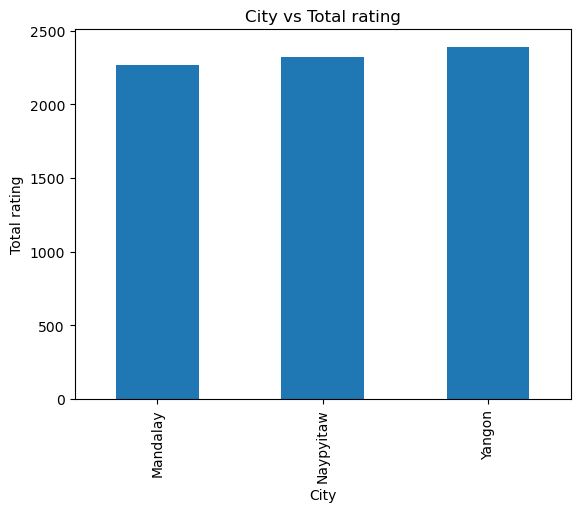

In [27]:
city_rating.plot(kind = "bar")
plt.title("City vs Total rating")
plt.ylabel("Total rating")
plt.show()

## Is there a significant difference in customer ratings across different branches or cities?

In [28]:
branch_city_rating= data.groupby(["Branch", "City"])["Rating"].sum()

In [29]:
branch_city_rating

Branch  City     
A       Yangon       2389.2
B       Mandalay     2263.6
C       Naypyitaw    2319.9
Name: Rating, dtype: float64

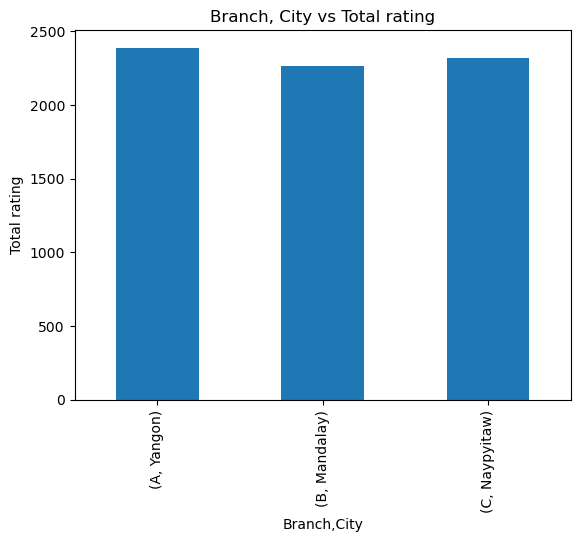

In [30]:
branch_city_rating.plot(kind = "bar")
plt.title("Branch, City vs Total rating")
plt.ylabel("Total rating")
plt.show()

## 2. Sales Analysis

## Which product line generates the highest total sales?

In [31]:
Product_line_total_sales = data.groupby("Product line")["Total"].sum()

In [32]:
Product_line_total_sales

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

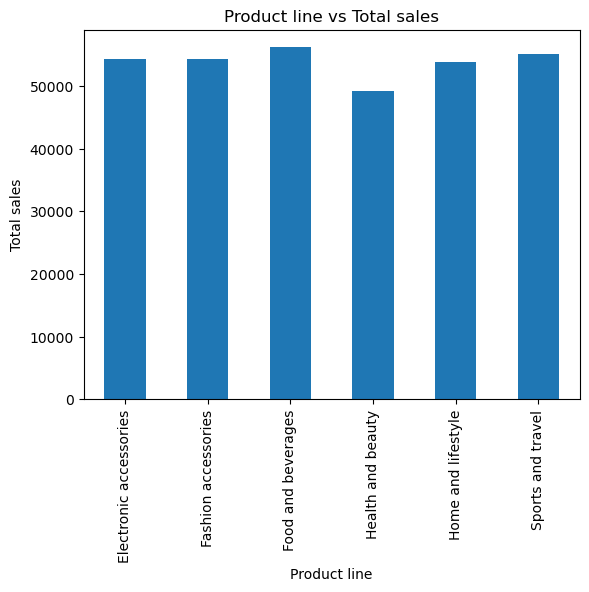

In [33]:
Product_line_total_sales.plot(kind = "bar")
plt.title("Product line vs Total sales")
plt.ylabel("Total sales")
plt.show()

## What is the average sales per branch or city?

In [34]:
branch_city_average_sales = data.groupby(["Branch", "City"])["Total"].mean()

In [35]:
branch_city_average_sales

Branch  City     
A       Yangon       312.354031
B       Mandalay     319.872506
C       Naypyitaw    337.099715
Name: Total, dtype: float64

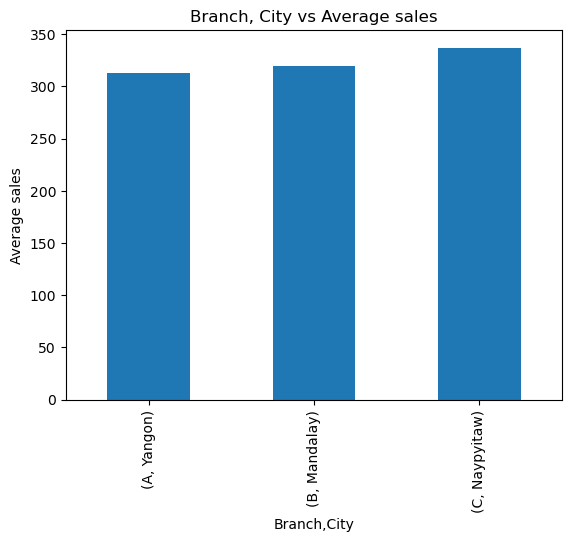

In [36]:
branch_city_average_sales.plot(kind = "bar")
plt.title("Branch, City vs Average sales")
plt.ylabel("Average sales")
plt.show()

## How do sales differ by customer type (Member vs Normal)?

In [37]:
customer_type_by_sales = data.groupby("Customer type")["Total"].sum()

In [38]:
customer_type_by_sales

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

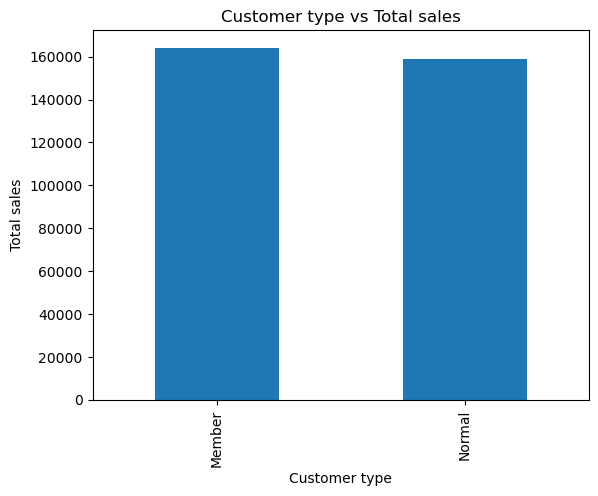

In [39]:
customer_type_by_sales.plot(kind = "bar")
plt.title("Customer type vs Total sales")
plt.ylabel("Total sales")
plt.show()

## 3. Customer Behavior

## What are the most popular product lines by gender?

In [40]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [41]:
data["Product line"].unique()

array(['Food and beverages', 'Fashion accessories', 'Home and lifestyle',
       'Sports and travel', 'Health and beauty', 'Electronic accessories'],
      dtype=object)

In [42]:
product_line_by_gender_map = data.groupby("Gender")["Product line"].value_counts()

In [43]:
product_line_by_gender_map

Gender  Product line          
Female  Fashion accessories       96
        Food and beverages        90
        Sports and travel         88
        Electronic accessories    84
        Home and lifestyle        79
        Health and beauty         64
Male    Health and beauty         88
        Electronic accessories    86
        Food and beverages        84
        Fashion accessories       82
        Home and lifestyle        81
        Sports and travel         78
Name: count, dtype: int64

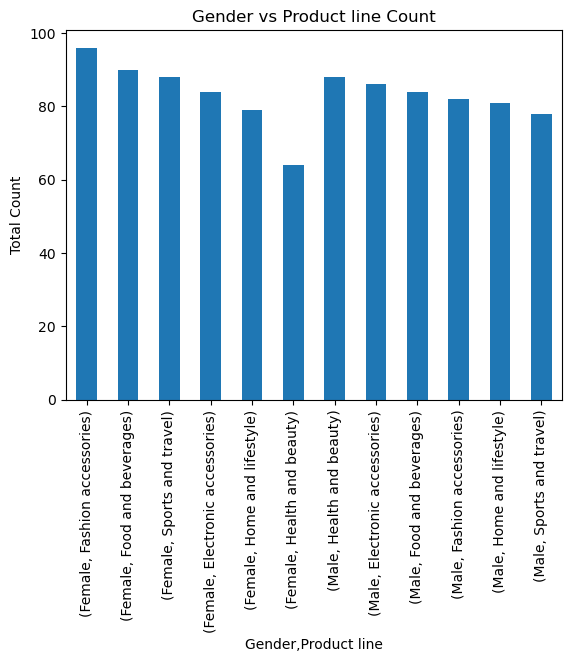

In [44]:
product_line_by_gender_map.plot(kind = "bar")
plt.title("Gender vs Product line Count")
plt.ylabel("Total Count")
plt.show()

## Which branch has the highest number of loyal (Member) customers?

In [45]:
branch_loyal_customer = data.groupby("Customer type")["Branch"].value_counts()

In [46]:
branch_loyal_customer

Customer type  Branch
Member         C         169
               A         167
               B         165
Normal         A         173
               B         167
               C         159
Name: count, dtype: int64

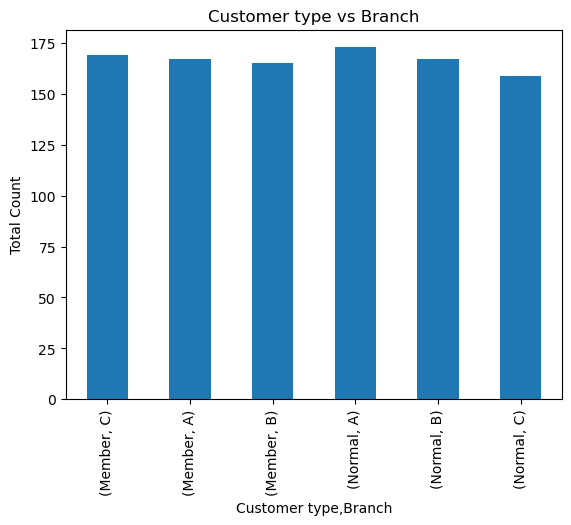

In [47]:
branch_loyal_customer.plot(kind = "bar")
plt.title("Customer type vs Branch")
plt.ylabel("Total Count")
plt.show()

## Are there any differences in sales patterns between male and female customers?

In [48]:
sales_pattern_in_gender = data.groupby("Gender")["Total"].sum()

In [49]:
sales_pattern_in_gender

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

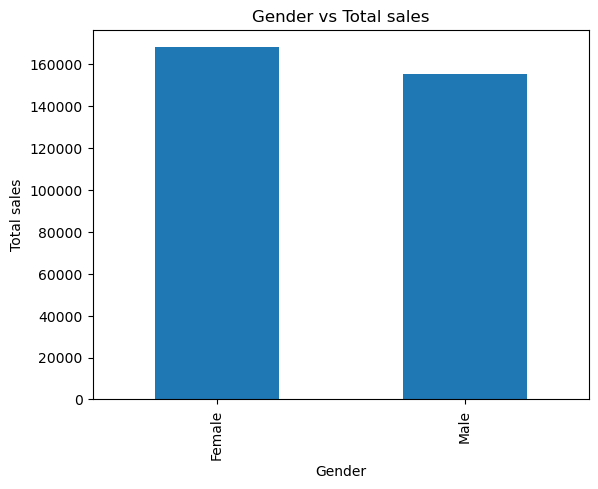

In [50]:
sales_pattern_in_gender.plot(kind = "bar")
plt.title("Gender vs Total sales")
plt.ylabel("Total sales")
plt.show()

## 4. Time-based Insights

## What are the peak sales times of the day?

In [51]:
peak_sales_time = data.groupby("Time")["Total"].sum()

In [52]:
peak_sales_time

Time
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

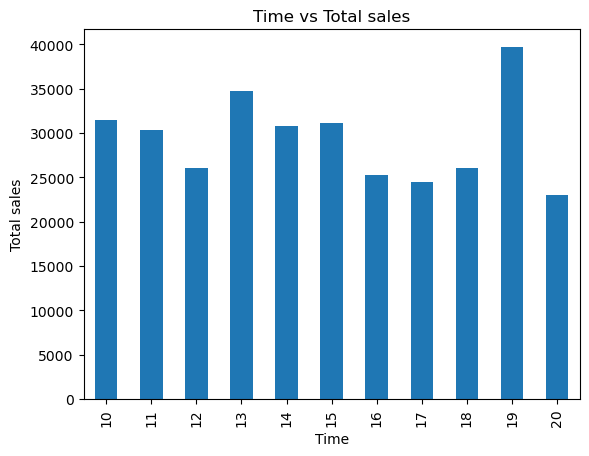

In [53]:
peak_sales_time.plot(kind = "bar")
plt.title("Time vs Total sales")
plt.ylabel("Total sales")
plt.show()

## How do sales vary by day, month, or over a specific period (e.g., seasonal trends)?

In [54]:
#How sales vary monthly
#Get the year from date
month = data["Date"].dt.month
year = data["Date"].dt.year
yearly_sales = data.groupby([month, year])["Total"].sum()

In [55]:
yearly_sales

Date  Date
1     2019    116291.868
2     2019     97219.374
3     2019    109455.507
Name: Total, dtype: float64

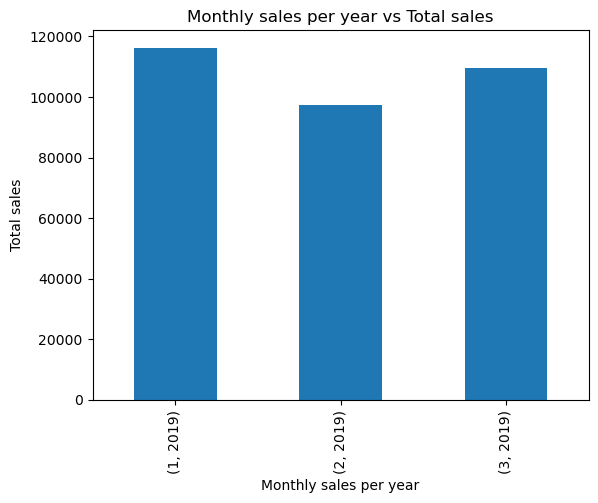

In [56]:
yearly_sales.plot(kind = "bar")
plt.title("Monthly sales per year vs Total sales")
plt.xlabel("Monthly sales per year")
plt.ylabel("Total sales")
plt.show()

## Which day of the week sees the highest sales?

In [57]:
day = data["Date"].dt.day
daily_sales = data.groupby(day)["Total"].sum()

In [58]:
daily_sales

Date
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

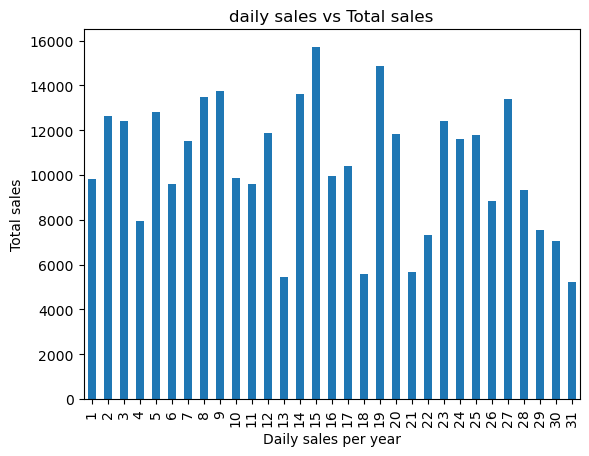

In [59]:
daily_sales.plot(kind = "bar")
plt.title("daily sales vs Total sales")
plt.xlabel("Daily sales per year")
plt.ylabel("Total sales")
plt.show()

## 5. Product Performance

## Which product line has the highest gross income?

In [60]:
product_line_gross_income = data.groupby("Product line")["gross income"].sum()

In [61]:
product_line_gross_income

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

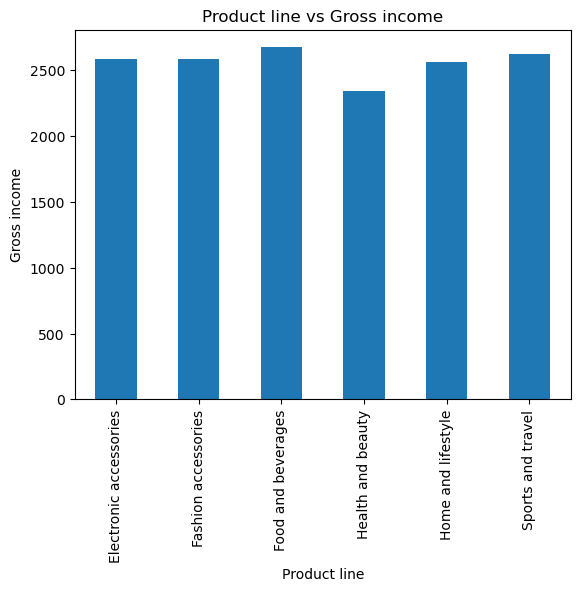

In [62]:
product_line_gross_income.plot(kind = "bar")
plt.title("Product line vs Gross income")
plt.ylabel("Gross income")
plt.show()

## What is the relationship between unit price and customer rating across different product lines?

In [63]:
#Correlation between unit price and customer rating across different product lines
corr_between_unit_price_and_rating = data["Unit price"].corr(data["Rating"])

In [64]:
corr_between_unit_price_and_rating

-0.008777507200778955

## 6. Payment Preferences

## Which payment method is most commonly used?

In [65]:
data["Payment"].unique()

array(['Cash', 'Ewallet', 'Credit card'], dtype=object)

In [66]:
data["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

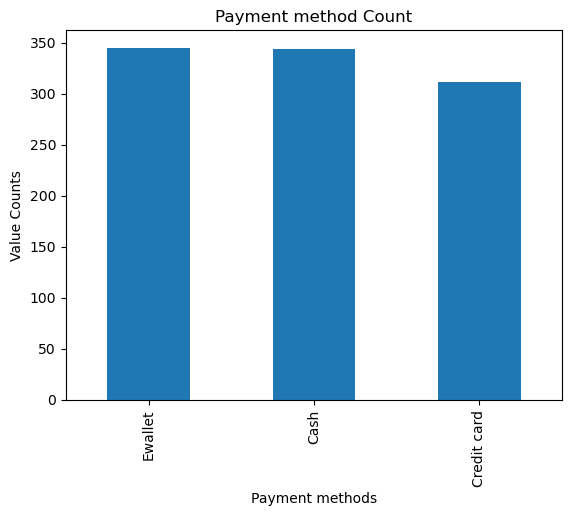

In [67]:
data["Payment"].value_counts().plot(kind= "bar")
plt.title("Payment method Count")
plt.xlabel("Payment methods")
plt.ylabel("Value Counts")
plt.show()

## Is there a difference in total sales between different payment methods (Cash, Ewallet, Credit card)?

In [68]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'Cost of goods sold', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [69]:
payment_method_per_sales = data.groupby("Payment")["Total"].sum()

In [70]:
payment_method_per_sales

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

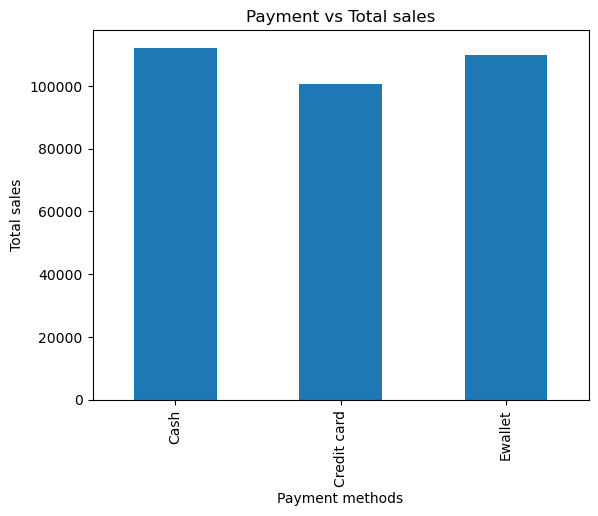

In [71]:
payment_method_per_sales.plot(kind = "bar")
plt.title("Payment vs Total sales")
plt.xlabel("Payment methods")
plt.ylabel("Total sales")
plt.show()